# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


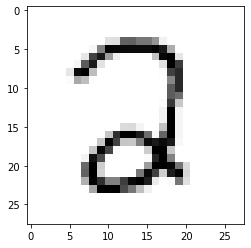

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.23546213004344033
train accuracy is: 0.7306793523618762, test accuracy is 0.7328629032258065


Epoch 10 Loss 0.08987339936603435
train accuracy is: 0.9235519946586547, test accuracy is 0.9369959677419355


Epoch 20 Loss 0.055138612463072396
train accuracy is: 0.9439158738107161, test accuracy is 0.9536290322580645


Epoch 30 Loss 0.04367478933458198
train accuracy is: 0.9515940577532966, test accuracy is 0.9601814516129032


Epoch 40 Loss 0.03797775143012877
train accuracy is: 0.957185778668002, test accuracy is 0.9642137096774194


Epoch 50 Loss 0.03442073639370115
train accuracy is: 0.9608579535970623, test accuracy is 0.9682459677419355


Epoch 60 Loss 0.03186583960634236
train accuracy is: 0.9634451677516275, test accuracy is 0.9692540322580645


Epoch 70 Loss 0.0298941076913094
train accuracy is: 0.9656150893006176, test accuracy is 0.9707661290322581


Epoch 80 Loss 0.028278491110582078
train accuracy is: 0.9669504256384577, test accuracy is 0.9702620967741935


Epoch 90 Loss 0.02691191450076475
train accuracy is: 0.9687030545818728, test accuracy is 0.9702620967741935


Epoch 100 Loss 0.025735642621795455
train accuracy is: 0.9705391420464029, test accuracy is 0.9712701612903226


Epoch 110 Loss 0.024705519529875736
train accuracy is: 0.971540644299783, test accuracy is 0.9717741935483871


Epoch 120 Loss 0.023784781806243615
train accuracy is: 0.9728759806376232, test accuracy is 0.9712701612903226


Epoch 130 Loss 0.022964788905335168
train accuracy is: 0.9738774828910032, test accuracy is 0.9717741935483871


Epoch 140 Loss 0.02222043276271939
train accuracy is: 0.9749624436654982, test accuracy is 0.9722782258064516


Epoch 150 Loss 0.021532887159310916
train accuracy is: 0.9757135703555333, test accuracy is 0.9722782258064516


Epoch 160 Loss 0.020894017883020886
train accuracy is: 0.9766316140877984, test accuracy is 0.9722782258064516


Epoch 170 Loss 0.020297747814865055
train accuracy is: 0.9772992822567184, test accuracy is 0.9732862903225806


Epoch 180 Loss 0.019730626036087533
train accuracy is: 0.9779669504256384, test accuracy is 0.9732862903225806


Epoch 190 Loss 0.01919922645022071
train accuracy is: 0.9786346185945585, test accuracy is 0.9737903225806451


Epoch 200 Loss 0.0186991519330105
train accuracy is: 0.9793022867634785, test accuracy is 0.9737903225806451


Epoch 210 Loss 0.01822415495151762
train accuracy is: 0.9799699549323986, test accuracy is 0.9742943548387096


Epoch 220 Loss 0.017765070605431
train accuracy is: 0.9805541645802036, test accuracy is 0.9742943548387096


Epoch 230 Loss 0.01732296985842479
train accuracy is: 0.9809714571857787, test accuracy is 0.9753024193548387


Epoch 240 Loss 0.0168989014034108
train accuracy is: 0.9818895009180437, test accuracy is 0.9768145161290323


0.02302214208256685

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.27507978255414883
train accuracy is: 0.5383074611917876, test accuracy is 0.5751008064516129


Epoch 10 Loss 0.10809107626427517
train accuracy is: 0.9031881155065932, test accuracy is 0.9117943548387096


Epoch 20 Loss 0.0818542702586092
train accuracy is: 0.9233016190953096, test accuracy is 0.9375


Epoch 30 Loss 0.0701122798789571
train accuracy is: 0.9336504757135704, test accuracy is 0.9470766129032258


Epoch 40 Loss 0.06312323466733603
train accuracy is: 0.9389918210649307, test accuracy is 0.9485887096774194


Epoch 50 Loss 0.05838234313931848
train accuracy is: 0.943248205641796, test accuracy is 0.9511088709677419


Epoch 60 Loss 0.054907103237141604
train accuracy is: 0.9467534635286263, test accuracy is 0.954133064516129


Epoch 70 Loss 0.05222383319221212
train accuracy is: 0.9489233850776164, test accuracy is 0.9551411290322581


Epoch 80 Loss 0.05007594345091216
train accuracy is: 0.9505925554999165, test accuracy is 0.9571572580645161


Epoch 90 Loss 0.04830426126430328
train accuracy is: 0.9518444333166416, test accuracy is 0.9576612903225806


Epoch 100 Loss 0.04681307750546148
train accuracy is: 0.9525955600066767, test accuracy is 0.9581653225806451


Epoch 110 Loss 0.04553410507536904
train accuracy is: 0.9537639793022867, test accuracy is 0.9596774193548387


Epoch 120 Loss 0.044422633749833976
train accuracy is: 0.9550158571190118, test accuracy is 0.9611895161290323


Epoch 130 Loss 0.043444163303244895
train accuracy is: 0.9555166082457018, test accuracy is 0.9621975806451613


Epoch 140 Loss 0.04257424419972386
train accuracy is: 0.9563511934568519, test accuracy is 0.9621975806451613


Epoch 150 Loss 0.04179483540105074
train accuracy is: 0.957102320146887, test accuracy is 0.9637096774193549


Epoch 160 Loss 0.041090185157936
train accuracy is: 0.957603071273577, test accuracy is 0.9642137096774194


Epoch 170 Loss 0.04044913497338479
train accuracy is: 0.9581872809213821, test accuracy is 0.9642137096774194


Epoch 180 Loss 0.039863659345964156
train accuracy is: 0.9586880320480721, test accuracy is 0.9652217741935484


Epoch 190 Loss 0.03932458045692992
train accuracy is: 0.9592722416958771, test accuracy is 0.9652217741935484


Epoch 200 Loss 0.038827247984835576
train accuracy is: 0.9596895343014522, test accuracy is 0.9652217741935484


Epoch 210 Loss 0.038365582251387205
train accuracy is: 0.9601902854281422, test accuracy is 0.9662298387096774


Epoch 220 Loss 0.037936462212828106
train accuracy is: 0.9602737439492572, test accuracy is 0.9662298387096774


Epoch 230 Loss 0.037535179478986144
train accuracy is: 0.9605241195126022, test accuracy is 0.9667338709677419


Epoch 240 Loss 0.037159489807127945
train accuracy is: 0.9606910365548322, test accuracy is 0.9672379032258065


0.06180806802836246

### Comparing results of NN and LR

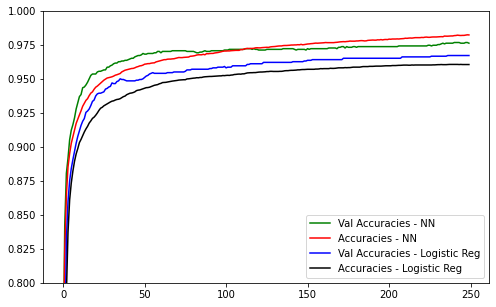

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

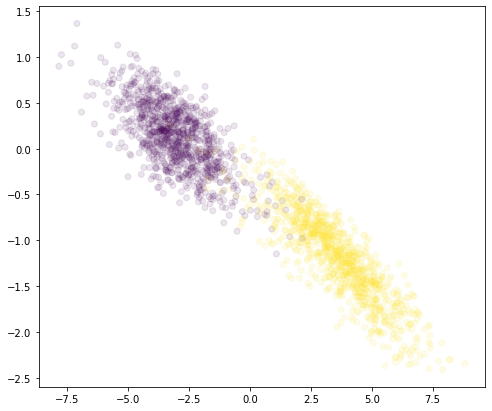

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

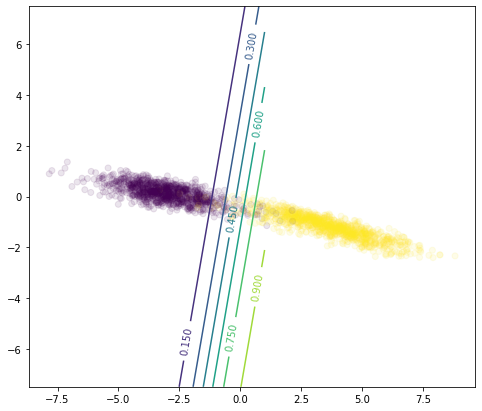

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );